### 蒙特卡洛求圆周率

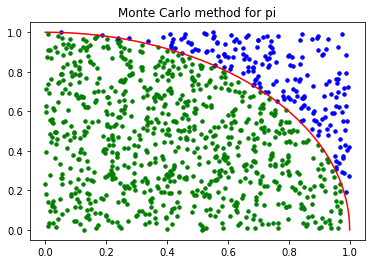

pi is 3.232


In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
def pi(num):
    count = 0
    i = 1
    x_in = []
    y_in = []
    x_out = []
    y_out = []
    while i <= num:
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            count += 1
            x_in.append(x)
            y_in.append(y)
        else:
            x_out.append(x)
            y_out.append(y)
        i += 1
    plt.scatter(x_in, y_in, c='green', s=12)
    plt.scatter(x_out, y_out, c='blue', s=12)
    xlist = np.linspace(0,1,1000)
    ylist = np.sqrt(1-xlist**2)
    plt.plot(xlist, ylist, c='red')
    plt.title('Monte Carlo method for pi')
    plt.show()
    print('pi is ' + str(4.0*count/num))

pi(1000)

### Metropolis-Hastings 高斯分布函数积分

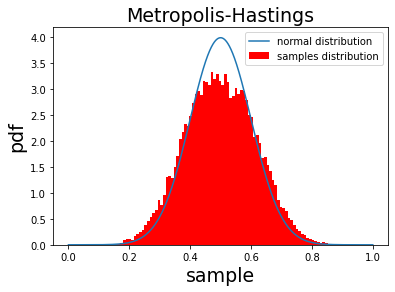

In [13]:
import random
import numpy as np
from matplotlib import pyplot as plt

mu = 0.5
sigma = 0.1
skip = 4000 # 收敛步数
num = 20000 # 采样点数

# Proposal Distribution q(z)
def Gaussian(x):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 /(2*sigma**2))

def M_H():
    x_0 = 0
    samples = []
    j = 1
    while len(samples) <= num:
        while True:
            x_1 = random.random()
            p_j = Gaussian(x_1)
            p_i = Gaussian(x_0)
            alpha = min(p_j / p_i, 1.0)
            r = random.random()
            if r <= alpha:
                x_0 = x_1
                if j >= skip:
                    samples.append(x_1)
                j += 1
                break
                
    return samples

norm_samples = M_H()
x = np.linspace(0, 1, len(norm_samples))
plt.plot(x, Gaussian(x), label='normal distribution')
plt.hist(norm_samples, 100, density=True, color='red', label='samples distribution')
plt.title('Metropolis-Hastings',fontsize=19)
plt.ylabel('pdf', fontsize=19)
plt.xlabel('sample', fontsize=19)
plt.legend()
plt.show()

### Gibbs Sampling

C:\Users\voidwu\Anaconda3\envs\torch16\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\voidwu\Anaconda3\envs\torch16\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


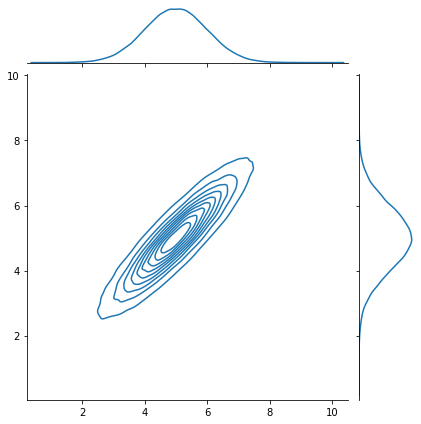

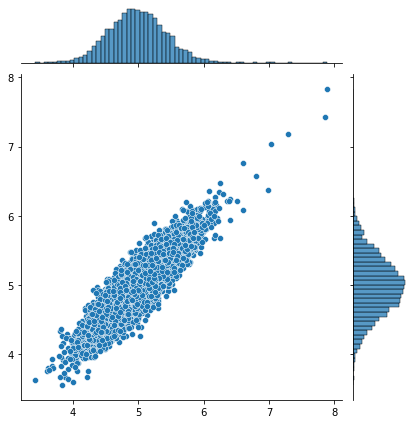

In [10]:
import numpy as np
import seaborn as sns


def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)


def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


def gibbs_sampling(mus, sigmas, iter=int(5e3)):
    samples = np.zeros((iter, 2))
    y = np.random.rand() * 10

    for i in range(iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples


if __name__ == '__main__':
    mus = np.array([5, 5])
    sigmas = np.array([[1, .9], [.9, 1]])

    # plot the ground truth
    x,y = np.random.multivariate_normal(mus, sigmas, int(1e5)).T
    sns.jointplot(x,y,kind="kde")

    # plot the Gibbs sampling results
    samples = gibbs_sampling(mus, sigmas)
    sns.jointplot(samples[:, 0], samples[:, 1])